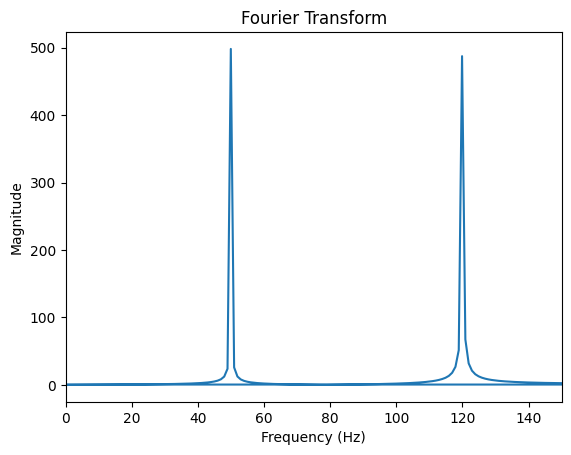

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time variable
t = np.linspace(0, 1, 1000)

# Signal with two sine waves at 50 Hz and 120 Hz
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

# Fourier Transform
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), t[1] - t[0])

# Plotting the Fourier Transform (magnitude)
plt.plot(frequencies, np.abs(fft_result))
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 150)
plt.show()

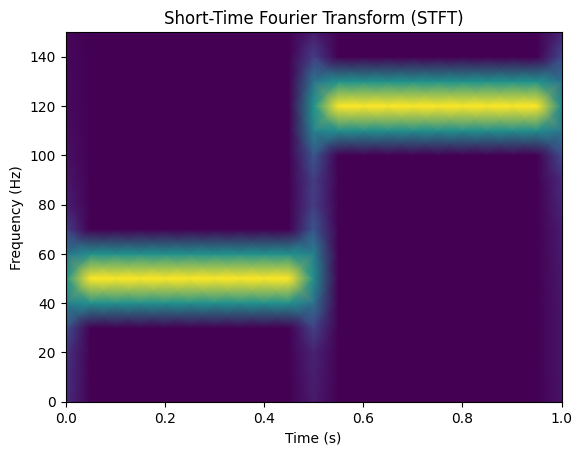

In [2]:
from scipy.signal import stft
import numpy as np
import matplotlib.pyplot as plt

# Time variable
t = np.linspace(0, 1, 1000)

# Signal with two sine waves at different times
signal = np.concatenate([np.sin(2 * np.pi * 50 * t[:500]), np.sin(2 * np.pi * 120 * t[500:])])

# Short-Time Fourier Transform (STFT)
frequencies, times, Zxx = stft(signal, fs=1000, nperseg=100)

# Plotting the STFT (magnitude)
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('Short-Time Fourier Transform (STFT)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, 150)
plt.show()

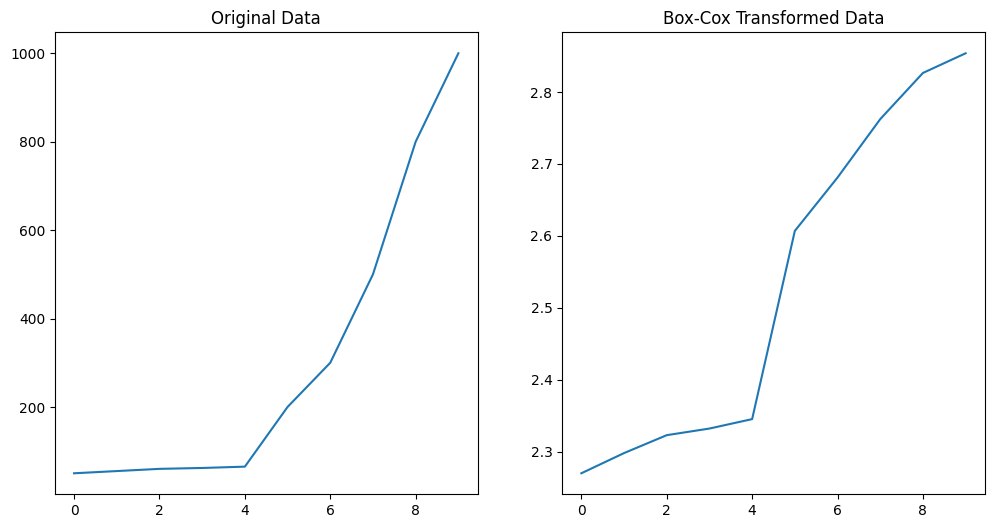

Optimal Lambda: -0.30894829002158863


In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Example time series data (e.g., sales data)
data = pd.Series([50, 55, 60, 62, 65, 200, 300, 500, 800, 1000])

# Apply the Box-Cox transformation
data_boxcox, lambda_optimal = stats.boxcox(data)

# Plot the original data and the transformed data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(data)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.plot(data_boxcox)
plt.title('Box-Cox Transformed Data')

plt.show()

print(f"Optimal Lambda: {lambda_optimal}")

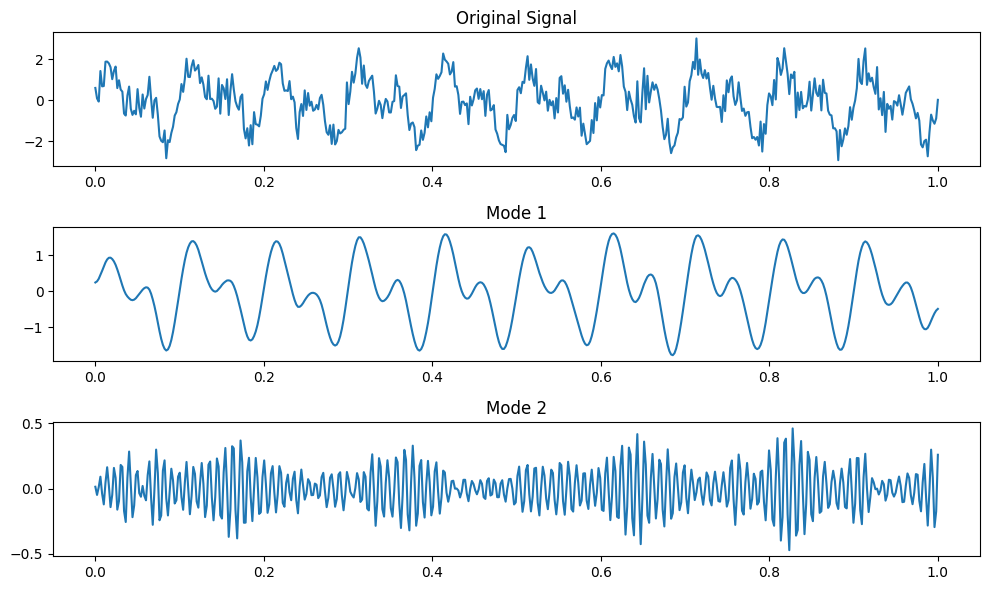

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from vmdpy import VMD

# Example time series: a combination of sine waves with noise
T = 500  # Length of the time series
t = np.linspace(0, 1, T)
signal = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 20 * t) + 0.5 * np.random.randn(T)

# Parameters for VMD
alpha = 2000       # Bandwidth constraint
tau = 0            # Noise tolerance (no strict fidelity enforcement)
K = 2              # Number of modes
DC = 0             # No DC component
init = 1           # Initialize omega_k's randomly
tol = 1e-7         # Tolerance for convergence

# Perform VMD
u, omega, _ = VMD(signal, alpha, tau, K, DC, init, tol)

# Plot the original signal and the decomposed modes
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')

for k in range(K):
    plt.subplot(3, 1, k+2)
    plt.plot(t, u[k])
    plt.title(f'Mode {k+1}')

plt.tight_layout()
plt.show()